In [62]:
import pandas as pd

all_postings = pd.read_csv('job_postings_unprocessed.csv')

# remove NaN in pay_period
all_postings = all_postings.dropna(subset=['pay_period'])
print(all_postings.columns)


Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'scraped'],
      dtype='object')


In [63]:
postings_salary = all_postings.loc[:, ['description', 'max_salary', 'med_salary', 'min_salary', 'pay_period']]
  
print(postings_salary.head())
# drop rows where max_salary, med_salary, and min_salary are all NaN
postings_salary = postings_salary.dropna(subset=['max_salary', 'med_salary', 'min_salary'], how='all')


                                          description  max_salary  med_salary  \
0   Overview\n\nHearingLife is a national hearing ...         NaN     5250.00   
3   descriptionTitle\n\n Looking for a great oppor...         NaN       22.27   
4   Job Summary\nAt iHerb, we are on a mission to ...    275834.0         NaN   
8   descriptionTitle\n\n $2,000 Sign-on Bonus Guar...         NaN       19.30   
11  Who We Are\n\nEscalent is an award-winning dat...     64000.0         NaN   

    min_salary pay_period  
0          NaN    MONTHLY  
3          NaN     HOURLY  
4     205956.0     YEARLY  
8          NaN     HOURLY  
11     58000.0     YEARLY  


In [64]:

# average max and min salary to med_salary if med_salary is NaN and max_salary and min_salary are not NaN
postings_salary['med_salary'] = postings_salary['med_salary'].fillna((postings_salary['max_salary'] + postings_salary['min_salary']) / 2)

# drop where med_salary is 0
postings_salary = postings_salary[postings_salary['med_salary'] != 0]



In [65]:
postings_salary['pay_period'].unique()

array(['MONTHLY', 'HOURLY', 'YEARLY', 'WEEKLY', 'ONCE'], dtype=object)

In [71]:
# using med_salary and pay_period to average annual salary
def get_annual_salary(row):
    # assume 40 hours per week 
    if row['pay_period'] == 'HOURLY':
        return row['med_salary'] * 40 * 52
    elif row['pay_period'] == 'WEEKLY':
        return row['med_salary'] * 52
    elif row['pay_period'] == 'MONTHLY':
        return row['med_salary'] * 12
    elif row['pay_period'] == 'YEARLY':
        return row['med_salary']
    elif row['pay_period'] == 'ONCE':
        return row['med_salary']
    

postings_salary['annual_salary'] = postings_salary.apply(get_annual_salary, axis=1)




In [75]:
# describe the annual salary data
print(postings_salary['annual_salary'].describe())


count    1.335000e+04
mean     1.425794e+05
std      3.416309e+06
min      1.350000e+01
25%      5.200000e+04
50%      8.250000e+04
75%      1.238000e+05
max      3.432000e+08
Name: annual_salary, dtype: float64


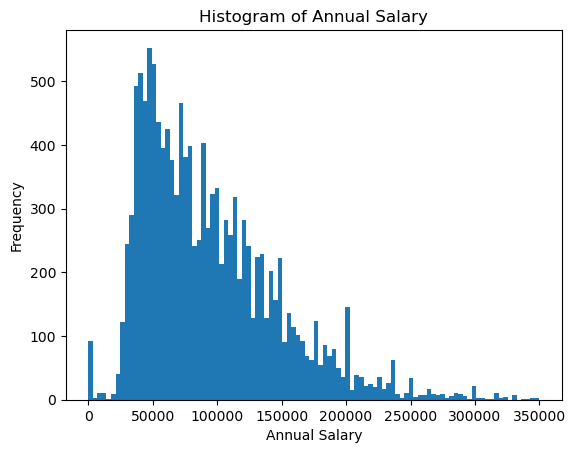

In [74]:
# historgram of annual salary
import matplotlib.pyplot as plt
plt.hist(postings_salary['annual_salary'], bins=100, range=(0, 350000))
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Annual Salary')
plt.show()

In [ ]:
# categorize salary into ranges
def categorize_salary(salary):
    if salary < 50000:
        return '0-50k'
    elif salary < 100000:
        return '50k-100k'
    elif salary < 150000:
        return '100k-150k'
    elif salary < 200000:
        return '150k-200k'
    elif salary < 250000:
        return '200k-250k'
    elif salary < 300000:
        return '250k-300k'
    else:
        return '300k+'

